# INTRO: Análisis Exploratorio Visual
Ejercicio para afianzar los conceptos básicos de EDA (Exploratory Data Analysis) Visual utilizando datos sobre la evolución del Covid.

Notebook por [Javier Blanco Cordero](https://www.linkedin.com/in/javier-blanco-cordero-71373656/).

### Enlaces de interés
*   [Slides de presentación](https://docs.google.com/presentation/d/1N7MPSC7ntM-0ZEHlrN5xRTpT4uNDyU_o53GBvnojUx8/edit?usp=sharing)
*   [Enlace al notebook de Colab de la clase 2](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Notebooks/02-analisis-exploratorio-visual/02___Analisis_exploratorio_visual.ipynb)
*   [Enlace a este notebook de Colab](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Notebooks/02-analisis-exploratorio-visual/EJERCICIO_4___EDA_Visual_Barsa_Madrid.ipynb)



# 01 Import
Importamos todas las librerías necesarias para este análisis ([¿No sabes lo que es una librería de Python?](https://www.quora.com/What-is-a-Python-library-and-what-can-I-use-it-for)).

Necesitaremos pandas, numpy, matplotlib.pyplot y seaborn.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 02 Importa dataframe Fifa19
Importa el dataset ya limpiado del **df_fifa19** (está en https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/Fifa19_Clean.csv.).

No necesitaremos todas las variables. Haz que el dataframe contenga solo éstas y en este orden:

cols = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Height_cm', 'Weight_kg', 'Value_€', 'Wage_€', 'Release Clause_€', 'Preferred Foot', 'Position', 'SprintSpeed']

In [ ]:
# Cols
cols = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 
        'Height_cm', 'Weight_kg', 'Value_€', 'Wage_€', 'Release Clause_€', 
        'Preferred Foot', 'Position', 'SprintSpeed']

# Url archivo raw
url = 'https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/Fifa19_Clean.csv'

# Importa csv
df_fifa19 = pd.read_csv(url, usecols=cols)

# Visualización primeras filas
df_fifa19.head()

Name  Age Nationality  ...    Wage_€  Release Clause_€ Height_cm
0           L. Messi   31   Argentina  ...  565000.0       226500000.0    170.18
1  Cristiano Ronaldo   33    Portugal  ...  405000.0       127100000.0    187.96
2          Neymar Jr   26      Brazil  ...  290000.0       228100000.0    175.26
3             De Gea   27       Spain  ...  260000.0       138600000.0    193.04
4       K. De Bruyne   27     Belgium  ...  355000.0       196400000.0    180.34

[5 rows x 14 columns]

# 03 Crea dataframes para Barsa y Madrid
A partir de df_fifa19 crea un df_madrid y un df_barsa con los jugadores correspondientes a cada equipo.

In [ ]:
# Lista de equipos total
lista_equipos = df_fifa19['Club'].unique()

# Cómo está escrito el nombre del Madrid en este dataset?
display([equipo for equipo in lista_equipos if 'Madrid' in equipo])

# Cómo está escrito el nombre del Barsa en este dataset?
display([equipo for equipo in lista_equipos if 'Bar' in equipo])

['Real Madrid', 'Atlético Madrid']

['FC Barcelona', 'Barnsley']

In [ ]:
# df_Madrid
filtro_madrid = df_fifa19['Club'] == 'Real Madrid'
df_madrid = df_fifa19[filtro_madrid]
df_madrid.head(3)

Name  Age Nationality  ...    Wage_€  Release Clause_€ Height_cm
6      L. Modrić   32     Croatia  ...  420000.0       137400000.0    172.72
8   Sergio Ramos   32       Spain  ...  380000.0       104600000.0    182.88
11      T. Kroos   28     Germany  ...  355000.0       156800000.0    182.88

[3 rows x 14 columns]

In [ ]:
# df_Barsa
filtro_barsa = df_fifa19['Club'] == 'FC Barcelona'
df_barsa = df_fifa19[filtro_barsa]
df_barsa.head(3)

Name  Age Nationality  ...    Wage_€  Release Clause_€ Height_cm
0        L. Messi   31   Argentina  ...  565000.0       226500000.0    170.18
7       L. Suárez   31     Uruguay  ...  455000.0       164000000.0    182.88
18  M. ter Stegen   26     Germany  ...  240000.0       123300000.0    187.96

[3 rows x 14 columns]

# 04 Qué equipo es mejor?
Cuidado, guardad vuestra cerveza y utilizad la ciencia de datos. 

## 0401 .describe()
Con el método .describe(), comprueba la distribución de la variable numérica overall.

In [ ]:
df_madrid['Overall'].describe()

count    33.000000
mean     78.242424
std       9.902747
min      62.000000
25%      67.000000
50%      80.000000
75%      87.000000
max      91.000000
Name: Overall, dtype: float64

In [ ]:
df_barsa['Overall'].describe()

count    33.000000
mean     78.030303
std       9.583465
min      61.000000
25%      69.000000
50%      82.000000
75%      87.000000
max      94.000000
Name: Overall, dtype: float64

## 0403 .hist()
Utiliza histogramas para comparar la variable Overall en una imagen con dos gráficos (dos en una misma columna).

Utiliza como bins de 60 a 95 con intervalos de 2.5 en 2.5 (60, 62.5, 65, 67.5, etc.) 


In [ ]:
sns.set()

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.tight_layout(pad=1)
fig.set_size_inches(6,6)

bins = [60, 62.5, 65, 67.5, 70, 72.5, 75, 77.5, 80, 82.5, 85, 87.5, 90, 92.5, 95]

# Tasa de mortalidad
ax1.hist(df_madrid['Overall'], 
         bins = bins, 
         label='Madrid', 
         edgecolor = 'black', 
         linewidth = 3,
         color='white')
ax1.set(xlabel = 'Overall')
ax1.set_ylim(top=6)
ax1.legend()

# Tasa de mortalidad
ax2.hist(df_barsa['Overall'], 
         bins = bins,
         label='Barsa', 
         linewidth = 3, 
         edgecolor = 'red', 
         color='blue')
ax2.set(xlabel = 'Overall')
ax2.legend()
plt.show()

# 05 Qué equipo tiene mejores jugadores españoles/extranjeros?
Vamos a utilizar para esta comparación una gráfica específica de seaborn: sns.[catplot()](https://seaborn.pydata.org/examples/grouped_barplot.html).

## 0501 Genera variable nacionalidad
Genera una variable binaria que identifique a un jugador como "Español" o "Extranjero".

In [ ]:
filtro_español = df_madrid['Nationality'] == 'Spain'
filtro_extranjero = df_madrid['Nationality'] != 'Spain'

df_madrid.loc[filtro_español, 'Nacionalidad'] = 'Español'
df_madrid.loc[filtro_extranjero, 'Nacionalidad'] = 'Extranjero'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
filtro_español = df_barsa['Nationality'] == 'Spain'
filtro_extranjero = df_barsa['Nationality'] != 'Spain'

df_barsa.loc[filtro_español, 'Nacionalidad'] = 'Español'
df_barsa.loc[filtro_extranjero, 'Nacionalidad'] = 'Extranjero'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


## 0502 Utiliza sns.catplot()
sns.[catplot](https://seaborn.pydata.org/examples/grouped_barplot.html) permite comparar 3 conceptos en una sola gráfica. 

Échale un vistazo a la documentación e intenta utilizarlo aquí.

En definitiva, trata de crear esta imagen.

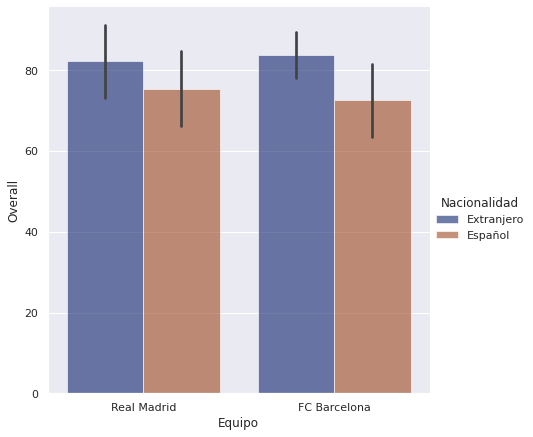

In [ ]:
g = sns.catplot(
    data=df_madrid.append(df_barsa), 
    kind="bar",
    x="Club", 
    y="Overall", 
    hue="Nacionalidad",
    ci="sd", 
    palette="dark", 
    alpha=.6, 
    height=6
)
g.set_axis_labels("Equipo", "Overall")
plt.show()

# 06 Compara alineaciones de rápidos
A veces en el Fifa lo (casi) único importante es la velocidad. Si tú, como gamer, sigues este único criterio, qué equipo prefirirías?

Escoge los 10 jugadores de campo (exluye los porteros) más rápidos de cada equipo y decide.

In [ ]:
for df_i in [df_madrid, df_barsa]:
  # Definimos el filtro de jugador de campo
  filtro_no_portero = df_i['Position'] != 'GK'

  # Nos quedamos solo con los jugadores de campo y con las columnas nombre y velocidad
  df_i = df_i.loc[filtro_no_portero, ['Name', 'SprintSpeed']]
  
  # Ordenamos el dataframe por la variable de velocidad
  df_i.sort_values('SprintSpeed', ascending=False, inplace=True)

  # Nos quedamos con los 10 más rápidos
  df_i = df_i.iloc[:10,:]

  display(df_i)
  display(df_i.describe())

Name  SprintSpeed
36             G. Bale         95.0
1143   Vinícius Júnior         94.0
62           R. Varane         85.0
430            Mariano         85.0
123           Carvajal         84.0
417          Odriozola         82.0
35             Marcelo         82.0
79       Marco Asensio         82.0
11327      Fran García         79.0
11163     Sergio López         79.0

SprintSpeed
count    10.000000
mean     84.700000
std       5.578729
min      79.000000
25%      82.000000
50%      83.000000
75%      85.000000
max      95.000000

Name  SprintSpeed
49       Jordi Alba         93.0
324   Nélson Semedo         92.0
155      O. Dembélé         92.0
0          L. Messi         86.0
236          Malcom         82.0
1007          Munir         80.0
6000       M. Wagué         79.0
192   Sergi Roberto         79.0
613    Denis Suárez         77.0
3684          Aleñá         76.0

SprintSpeed
count    10.000000
mean     83.600000
std       6.619836
min      76.000000
25%      79.000000
50%      81.000000
75%      90.500000
max      93.000000

# 07 Genera un informe con pandas-profiling
Genera un informe de pandas-profiling para el Madrid y otro para el Barsa. Visualízalos para responder:
- qué equipo tiene una altura media mayor?
- qué equipo tiene una edad media menor?
- cuánto mide el cuantil 75 del Madrid?
- con qué correla más la edad de los jugadores del Madrid, con su sueldo, su valor actual o su cláusula de rescisión? tiene sentido?

Nota: Como estos datasets son pequeños, puedes visualizar el el informe directamente en el notebook. Haz esto definiendo primero el informe como una variable, y luego ejecutando esa variable.

In [ ]:
# Instalamos pandas-profiling
! pip install -U pandas-profiling

     |████████████████████████████████| 245kB 5.5MB/s 
     |████████████████████████████████| 81kB 9.0MB/s 
     |████████████████████████████████| 81kB 9.5MB/s 
     |████████████████████████████████| 604kB 21.5MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
     |████████████████████████████████| 3.1MB 33.6MB/s 
     |████████████████████████████████| 296kB 34.0MB/s 
  Created wheel for phik: filename=phik-0.11.0-cp36-none-any.whl size=599738 sha256=c2d4d438325634927af139c0fefb63af7b10938a2ffe62cf0a37914e5f5d550f
  Stored in directory: /root/.cache/pip/wheels/af/54/11/aba77f21075918de02f7964eabfe8c10d5542df9e6ad10b225
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=805b6d626afe09ec90cd148a8925771d7a5b2d10ed705aef1863f185764b3942
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built phik htmlmin
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but yo

In [ ]:
# Importamos solo la función ProfileReport (la verdaderamente importante)
from pandas_profiling import ProfileReport

In [ ]:
# Definimos el informe del Madrid
profile_madrid = ProfileReport(df_madrid, 
                               title='Madrid', 
                               html={'style':{'full_width':False}})

# Lo ejecutamos
profile_madrid

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Definimos el informe del Barsa
profile_barsa = ProfileReport(df_barsa, 
                              title='Barsa', 
                              html={'style':{'full_width':False}})

# Lo ejecutamos
profile_barsa

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]